In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
import sys
import getpass
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

from metric_learn import NCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from tqdm import tqdm

username = getpass.getuser()
sys.path.append(f'../')

from src.support_models import MetricLearner

In [56]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=3000, n_features=768, n_informative=20,
                           n_classes=3, n_clusters_per_class=5, random_state=0)

X, X_test, Y, y_test = train_test_split(X, Y, test_size=0.7)
X.shape, Y.shape

((900, 768), (900,))

# Fits and plots

In [57]:
def scatter(x, labels, title, subtitle=None):
    palette = np.array(sns.color_palette("hls", 4))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0,alpha = 0.5, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.title(title)

(900, 2) (900,)


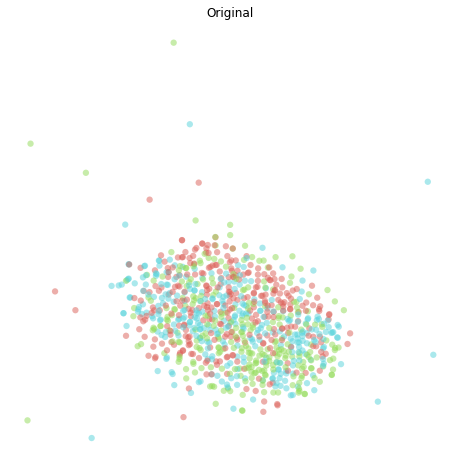

In [58]:
tsne = TSNE()
X_orig = tsne.fit_transform(X)
print(X_orig.shape, Y.shape)
scatter(X_orig, Y, 'Original')

with: 0.5466666666666666
without: 0.5700000000000001


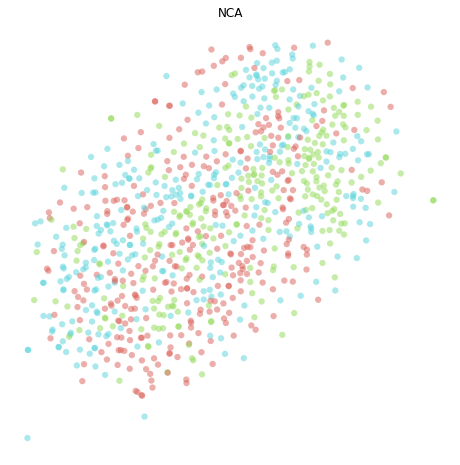

In [59]:
mlearner = MetricLearner('NCA')
X_transformed = mlearner.fit_transform(X, Y)

tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_transformed)
except ValueError as e:
    print(mltool_name, e)
#print(X_reduced.shape, Y.shape)

clf = make_pipeline(MetricLearner('NCA'), KNeighborsClassifier())
print('with:', cross_val_score(clf, X, Y).mean())

clf = KNeighborsClassifier()
print('without:', cross_val_score(clf, X, Y).mean())

scatter(X_reduced, Y, "NCA")

# Visualization

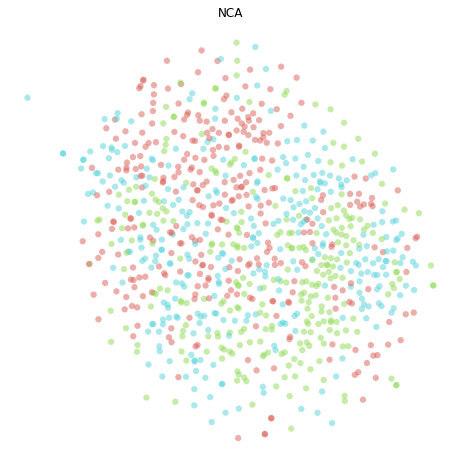

In [60]:
mlearner = MetricLearner('NCA')
mlearner.fit(X, Y)
X_transformed = mlearner.transform(X)
tsne = TSNE()
X_reduced = tsne.fit_transform(X_transformed)
scatter(X_reduced, Y, "NCA")

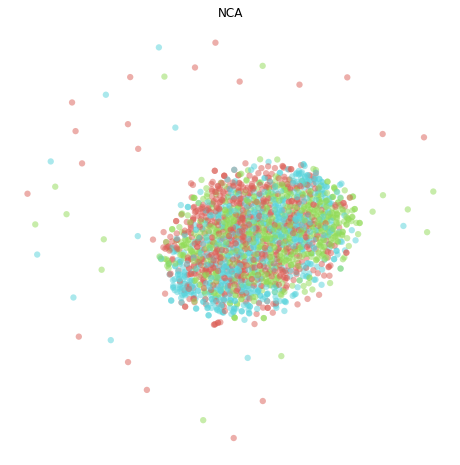

In [61]:
X_transformed = mlearner.transform(X_test)
tsne = TSNE()
X_reduced = tsne.fit_transform(X_transformed)
scatter(X_reduced, y_test, "NCA")

In [67]:
mlearner = MetricLearner('sieamese')
mlearner.fit(X, Y)
X_train = mlearner.transform(X)
X_test = mlearner.transform(X_test)

tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_transformed)
except ValueError as e:
    print(mltool_name, e)

Epoch 1/100
20/20 [==============================] - 15s 673ms/step - loss: 0.4772
Epoch 2/100
20/20 [==============================] - 13s 665ms/step - loss: 0.6103
Epoch 3/100
20/20 [==============================] - 13s 658ms/step - loss: 0.5954
Epoch 4/100
20/20 [==============================] - 13s 650ms/step - loss: 0.5948
Epoch 5/100
20/20 [==============================] - 13s 646ms/step - loss: 0.5721
Epoch 6/100
20/20 [==============================] - 13s 668ms/step - loss: 0.4925
Epoch 7/100
20/20 [==============================] - 13s 647ms/step - loss: 0.3789
Epoch 8/100
20/20 [==============================] - 13s 655ms/step - loss: 0.2946
Epoch 9/100
20/20 [==============================] - 13s 662ms/step - loss: 0.2286
Epoch 10/100
20/20 [==============================] - 13s 649ms/step - loss: 0.1698
Epoch 11/100
20/20 [==============================] - 13s 643ms/step - loss: 0.1394
Epoch 12/100
20/20 [==============================] - 13s 646ms/step - loss: 0.1001
E

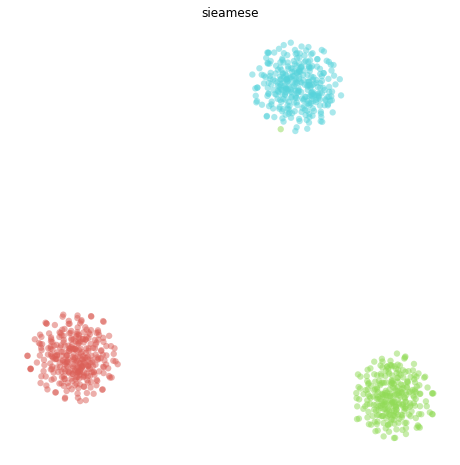

In [68]:
X_reduced = tsne.fit_transform(X_train)
scatter(X_reduced, Y, "sieamese")

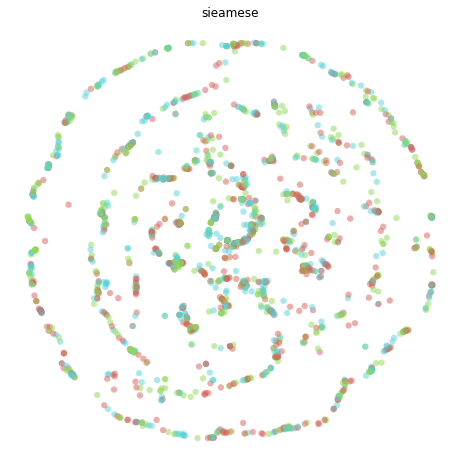

In [69]:
X_reduced = tsne.fit_transform(X_test)
scatter(X_reduced, y_test, "sieamese")

In [71]:
clf = KNeighborsClassifier()
print('with train:', cross_val_score(clf, X_train, Y).mean())

clf = KNeighborsClassifier()
print('with test:', cross_val_score(clf, X_test, y_test).mean())

with train: 0.9988888888888889
with test: 0.3352380952380953
